In [1]:
import nltk       
import json
import matplotlib.pyplot as plt 
from wordcloud import WordCloud
from collections import Counter

In [2]:
# You don't have to download the following data every time.
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('gutenberg')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/taehyun/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/taehyun/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package gutenberg to
[nltk_data]     /Users/taehyun/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/taehyun/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

# NLTK Example

In [3]:
from nltk.corpus import gutenberg   # Docs from project gutenberg.org

files_en = gutenberg.fileids()      # Get file ids
print(files_en[0])                  # The first book id  

austen-emma.txt


In [4]:
doc_en = gutenberg.open('austen-emma.txt').read()

print(doc_en[0:200]) # print the first 200 characters of the book

[Emma by Jane Austen 1816]

VOLUME I

CHAPTER I


Emma Woodhouse, handsome, clever, and rich, with a comfortable home
and happy disposition, seemed to unite some of the best blessings
of existence; an


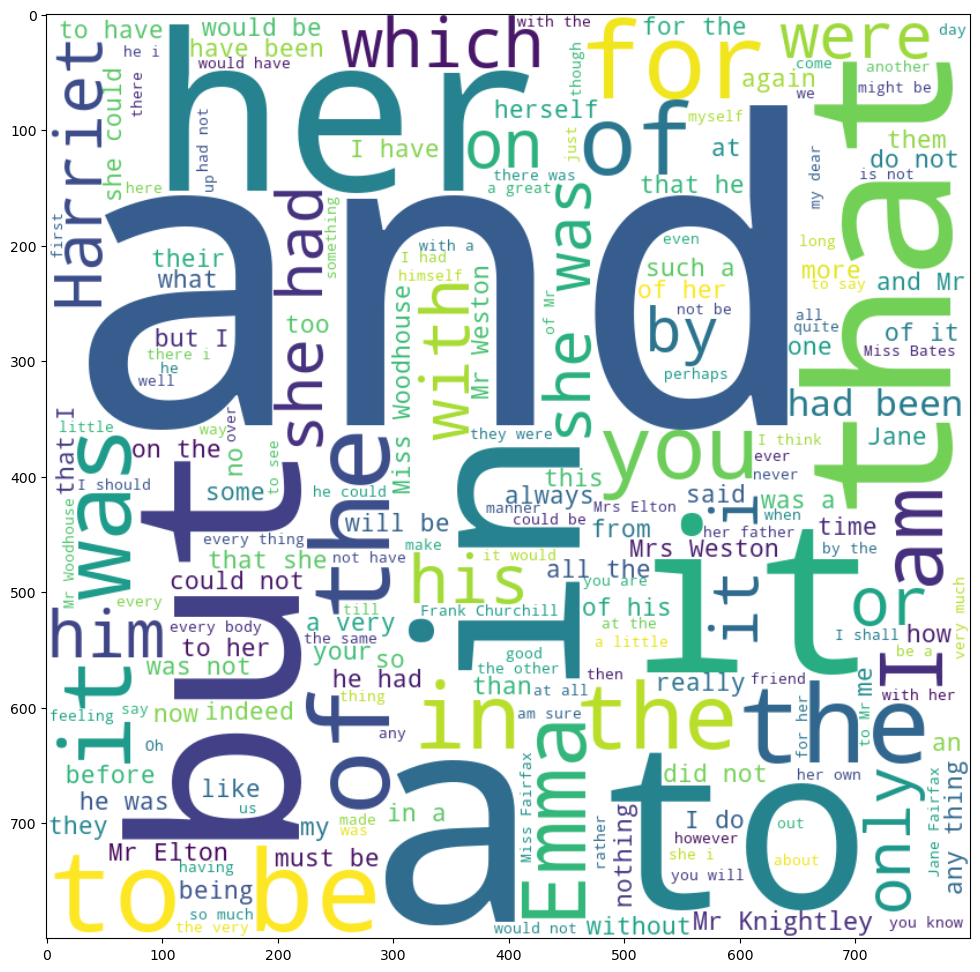

In [5]:
#font_filename = '/System/Library/Fonts/Supplemental/AppleGothic.ttf'
#font_filename = 'c:/windows/fonts/gulim.ttc'     

wordcloud = WordCloud(width = 800, height = 800, 
                #font_path=font_filename,
                background_color ='white', 
                stopwords = [], 
                min_font_size = 10).generate(doc_en)

plt.figure(figsize = (12, 12), facecolor = None) 
plt.imshow(wordcloud, interpolation='bilinear')
plt.show() 

In [6]:
sentences_en = nltk.tokenize.sent_tokenize(doc_en)

print(sentences_en[:5])

['[Emma by Jane Austen 1816]\n\nVOLUME I\n\nCHAPTER I\n\n\nEmma Woodhouse, handsome, clever, and rich, with a comfortable home\nand happy disposition, seemed to unite some of the best blessings\nof existence; and had lived nearly twenty-one years in the world\nwith very little to distress or vex her.', "She was the youngest of the two daughters of a most affectionate,\nindulgent father; and had, in consequence of her sister's marriage,\nbeen mistress of his house from a very early period.", 'Her mother\nhad died too long ago for her to have more than an indistinct\nremembrance of her caresses; and her place had been supplied\nby an excellent woman as governess, who had fallen little short\nof a mother in affection.', "Sixteen years had Miss Taylor been in Mr. Woodhouse's family,\nless as a governess than a friend, very fond of both daughters,\nbut particularly of Emma.", 'Between _them_ it was more the intimacy\nof sisters.']


In [7]:
noun_adj_list = []
for sentence in sentences_en:
    tokens = nltk.tokenize.word_tokenize(sentence)
    tags = nltk.pos_tag(tokens)
    for word, tag in tags:
        if tag in ['NN', 'NNP', 'ADJ', 'JJ', 'VB', 'VBD']:
            noun_adj_list.append(word.lower())

print(noun_adj_list[:10])

['emma', 'jane', 'austen', ']', 'volume', 'emma', 'woodhouse', 'handsome', 'clever', 'rich']


In [8]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

from nltk.stem import PorterStemmer
stemmer=PorterStemmer()

stemmed = []
for token in noun_adj_list:
    if token == '' or token in stop_words:
        continue
    stemmed.append(stemmer.stem(token))

from collections import Counter

counts = Counter(stemmed)
tags = counts.most_common(50)
print(tags)

[('mr.', 1091), ('emma', 851), ('mrs.', 668), ('miss', 600), ('harriet', 496), ('said', 483), ('weston', 435), ('thing', 394), ('elton', 385), ('knightley', 380), ('littl', 351), ('good', 320), ('woodhous', 309), ('much', 308), ('jane', 301), ('time', 275), ('great', 264), ('say', 253), ('noth', 249), ('think', 248), ('dear', 234), ('man', 232), ('fairfax', 232), ('churchil', 229), ('frank', 207), ('look', 200), ('happi', 198), ('father', 196), ('bodi', 192), ('young', 192), ('sure', 183), ('friend', 175), ('see', 174), ('thought', 168), ('day', 160), ('hartfield', 160), ('first', 160), ('know', 156), ('seem', 154), ('way', 152), ('give', 145), ('bate', 140), ('make', 139), ('mani', 138), ('poor', 136), ('wish', 130), ('woman', 129), ('like', 129), ('love', 128), ('come', 127)]


## Tweet Analysis

In [9]:
# Read tweets into statuses variable
statuses = []

with open('tesla.json', 'r') as f:
    for line in f:
        data = json.loads(line)
        statuses += data

In [10]:
print(len(statuses))
statuses[0]['text']

1064


'Tesla’s Plans for Zero Rare Earth EV Motor Could Undermine Beijing’s Secret Weapon—Its Rare Earth Monopoly… https://t.co/tN8La1k0sc'

In [13]:
retweets = [ (status['retweet_count'], 
   status['retweeted_status']['user']['screen_name'], 
   status['text']) for status in statuses if 'retweeted_status' in status]
print(retweets[0])

(4, 'FoxNews', 'RT @FoxNews: Texas DPS warnings about travel to Mexico are changing plans for some spring breakers https://t.co/7R4xnpAbkT')


In [14]:
# Reasonable solution but can produce duplicate answers
from operator import itemgetter

top_retweets = sorted(retweets, key=itemgetter(0), reverse=True)
top_retweets[:10]

[(30340,
  'Nemertes_',
  "RT @Nemertes_: by far The funniest thing ive learned about tesla's is that you can immobilize it with a circle of Salt like its an evil spi…"),
 (11684,
  'elonmusk',
  'RT @elonmusk: What the Tesla Giga Nevada factory will look like when finished. https://t.co/0O5U8jRerQ'),
 (11372,
  'elonmusk',
  'RT @elonmusk: Cybertruck at Tesla Engineering HQ https://t.co/2xo9Hjgfk9'),
 (9101,
  'elonmusk',
  'RT @elonmusk: Congrats Tesla California factory team on all-time record production! https://t.co/1aF53hgWgM'),
 (8801,
  'QuaiNetwork',
  'RT @QuaiNetwork: The development team working on Quai consists of former @ConsenSys, @Tesla, @amazon, and @Apple engineers who dropped ever…'),
 (6050,
  'iGimme',
  'RT @iGimme: Tesla นี่ฉีกทุกกฎ Disrupt การซื้อรถไทยสุดๆ เธรดนี้ขอจดเท่าที่จำได้ 🧵\nทั้งเจอกับตัวเอง และเพื่อนที่ซื้อด้วยกัน ใครมีอะไรอยากเสริ…'),
 (5944,
  'IustitiaCoin',
  'RT @IustitiaCoin: @Tesla @elonmusk once accepted #Bitcoin, but stopped due to environmenta

In [15]:
status_texts = [ status['text'] for status in statuses ]

tokens = []
for s in status_texts:
    tokens += nltk.tokenize.word_tokenize(s.lower())

from nltk.corpus import stopwords
stop_words = stopwords.words('english') + [
    '.', ',', '--', '\'s', '?', '!', ')', '(', ':', '\'',
    '\'re', '"', '-', '}', '{', u'—', 'rt', 'http', 't', 'co', '@', '#',
    ]

from nltk.stem import PorterStemmer
stemmer=PorterStemmer()

stemmed = []
for token in tokens:
    if token == '' or token in stop_words:
        continue
    stemmed.append(stemmer.stem(token))

print(stemmed[:10])          # print the first 10 tokens

['tesla', '’', 'plan', 'zero', 'rare', 'earth', 'ev', 'motor', 'could', 'undermin']


In [16]:
counts = Counter(stemmed)
tags = counts.most_common(300)
print(tags)

[('tesla', 817), ('http', 578), ('’', 130), ('$', 128), ('elonmusk', 116), ('de', 105), ('car', 88), ('new', 81), ('model', 75), ('elon', 71), ('musk', 67), ('supercharg', 53), ('que', 52), ('la', 52), (';', 50), ('teslaconom', 48), ('electr', 48), ('like', 47), ('make', 46), ('keep', 45), ('en', 42), ('…', 41), ('&', 41), ('su', 38), ('would', 38), ('tsla', 36), ('el', 35), ('lo', 33), ('time', 33), ('go', 33), ('ev', 32), ('amp', 32), ('never', 31), ('da', 30), ('``', 30), ('one', 30), ('3', 30), ('build', 28), ('es', 28), ('vw', 27), ('engin', 27), ('charg', 26), ('2', 25), ('ask', 25), ('happen', 25), ('jonneuschel', 24), ('worker', 24), ("n't", 24), ('vehicl', 24), ('semi', 24), ('‘', 24), ('alex_avoigt', 23), ('gigafactori', 23), ('harddrivemag', 23), ('twist', 23), ('metal', 23), ('//t.co/k1l3wgb6l', 23), ('use', 22), ('un', 22), ('para', 22), ('giga', 21), ('million', 21), ('see', 21), ('1', 21), ('die', 21), ('v4', 21), ('2023', 21), ('first', 21), ('se', 21), ('year', 21), ('

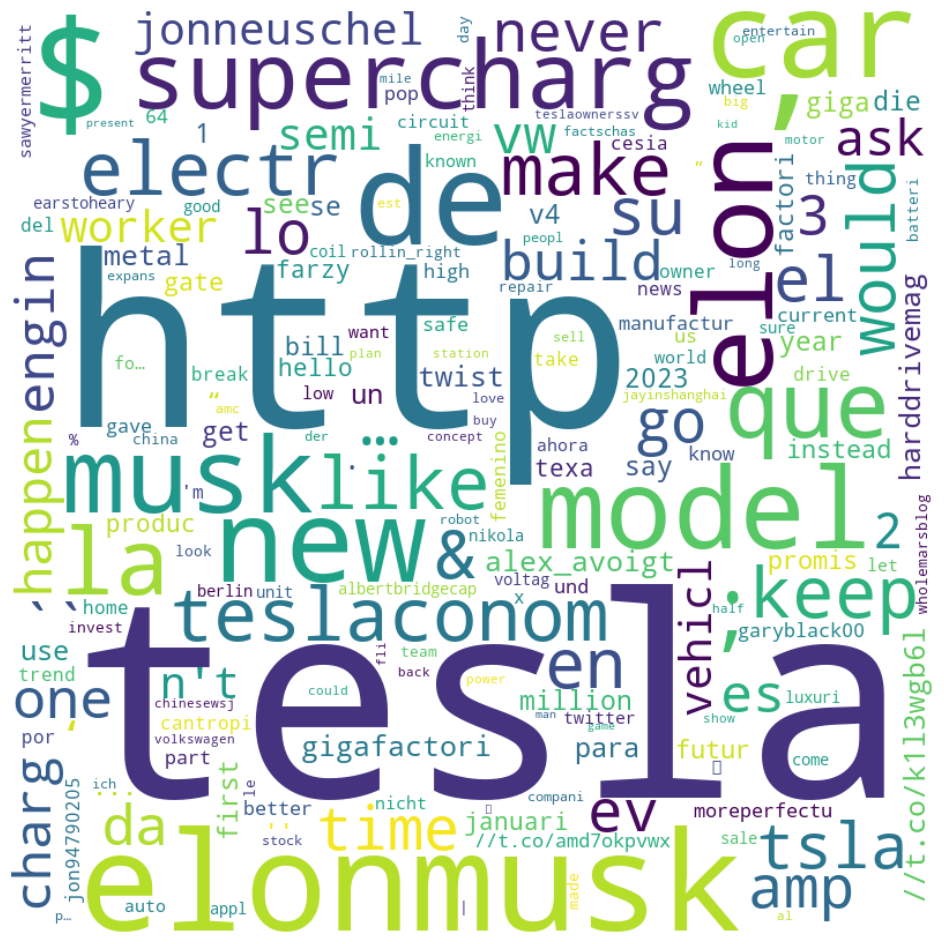

In [30]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt 

#font_filename = '/System/Library/Fonts/Supplemental/AppleGothic.ttf'
#font_filename = 'c:/windows/fonts/gulim.ttc'     

wordcloud = WordCloud(width = 800, height = 800, 
                #font_path=font_filename,
                background_color ='white', 
                stopwords = [], 
                min_font_size = 10).generate_from_frequencies(dict(tags))

plt.figure(figsize = (12, 12), facecolor = None) 
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off") 
  
plt.show() 